In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
df = pd.read_csv('../data/train_kaggle.csv')
df.head()

/tmp/ipykernel_2143/1526868489.py:1: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/train_kaggle.csv')


,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
0,10493832.0,Kelaniya,1209.6,756.0,5292.0,4
1,10178643.0,Moratuwa,1590.12,1060.08,6007.12,1
2,10513916.0,Wattala,2288.88,1481.04,9155.52,4
3,10334589.0,Wattala,2274.94,1739.66,9099.76,4
4,10458365.0,Kelaniya,2345.49,2069.55,9243.99,4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774155 entries, 0 to 774154
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Customer_ID       774153 non-null  float64
 1   outlet_city       774153 non-null  object 
 2   luxury_sales      774120 non-null  object 
 3   fresh_sales       774114 non-null  object 
 4   dry_sales         774125 non-null  object 
 5   cluster_catgeory  774154 non-null  object 
dtypes: float64(1), object(5)
memory usage: 35.4+ MB


In [6]:
df.shape

(774155, 6)

### **Convert Sales Column to Floats**

In [7]:
def convert_to_float_and_find_errors(dataframe, column):
    error_rows = []
    for index, value in dataframe[column].items():
        try:
            float(value)
        except ValueError:
            error_rows.append((index, value))
    return error_rows

# Convert 'luxury_sales' column to float and find rows causing ValueError
error_rows = convert_to_float_and_find_errors(df, 'luxury_sales')

# Print rows causing ValueError
print("Rows causing ValueError:")
for index, value in error_rows:
    print(f"Index: {index}, Value: {value}")

#drop rows causing ValueError
df = df.drop([index for index, value in error_rows])
df.shape


Rows causing ValueError:
Index: 80043, Value: One thousand four hundread ruppes
Index: 175278, Value: nul
Index: 296621, Value: nul
Index: 297911, Value: Eight hundread ruppess
Index: 326593, Value: six hundread and hirty 
Index: 367935, Value: nul
Index: 497177, Value: Thousand tow hundread 
Index: 497245, Value: seven hundread and nine ruppees
Index: 558562, Value: Three thousand two hundread ruppess
Index: 753131, Value: Four thousand one hundread ruppess


(774145, 6)

In [8]:
error_rows = convert_to_float_and_find_errors(df, 'fresh_sales')

# Print rows causing ValueError
print("Rows causing ValueError:")
for index, value in error_rows:
    print(f"Index: {index}, Value: {value}")

df = df.drop([index for index, value in error_rows])
df.shape

Rows causing ValueError:
Index: 161810, Value: Six hundread and five ruppes
Index: 174714, Value: nul
Index: 268571, Value: nul
Index: 326334, Value: Three thousana and five hundread
Index: 327495, Value: nul
Index: 327505, Value: nul
Index: 558897, Value: thirteen thousand ruppes
Index: 752816, Value: Five thousand ruppes
Index: 753256, Value: Two thousand seven hundread ruppess


(774136, 6)

In [9]:
error_rows = convert_to_float_and_find_errors(df, 'dry_sales')

# Print rows causing ValueError
print("Rows causing ValueError:")
for index, value in error_rows:
    print(f"Index: {index}, Value: {value}")

df = df.drop([index for index, value in error_rows])
df.shape

Rows causing ValueError:
Index: 148029, Value: Four thousand and two hundread ruppes
Index: 174631, Value: nul
Index: 174720, Value: nul


(774133, 6)

In [10]:
df['luxury_sales'] = df['luxury_sales'].astype(float).round(2)
df['fresh_sales'] = df['fresh_sales'].astype(float).round(2)
df['dry_sales'] = df['dry_sales'].astype(float).round(2)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 774133 entries, 0 to 774154
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Customer_ID       774131 non-null  float64
 1   outlet_city       774131 non-null  object 
 2   luxury_sales      774098 non-null  float64
 3   fresh_sales       774092 non-null  float64
 4   dry_sales         774103 non-null  float64
 5   cluster_catgeory  774132 non-null  object 
dtypes: float64(4), object(2)
memory usage: 41.3+ MB


### **Check for Duplicates**

In [11]:
# handle duplicates
df.duplicated().sum()

0

### **Handle Missing Values**

In [12]:
df['Customer_ID'].isna().sum() 

2

In [13]:
def find_missing_index(dataframe, column):
    return dataframe[dataframe[column].isna()].index


In [14]:
indexes = find_missing_index(df, 'Customer_ID')
df = df.drop(indexes)
df.shape

(774131, 6)

In [15]:
indexes = find_missing_index(df, 'outlet_city')
df = df.drop(indexes)
df.shape

(774129, 6)

In [16]:
indexes = find_missing_index(df, 'cluster_catgeory') 
df = df.drop(indexes)
df.shape

(774128, 6)

#### **remove unnecersy categories**

In [17]:
valid_categories = [1,2,3,4,5,6]

indexes = df[~df['cluster_catgeory'].isin(valid_categories)].index
df = df.drop(indexes)
df.shape

(643053, 6)

In [18]:
df['cluster_catgeory'] = df['cluster_catgeory'].astype(int)

In [19]:
df['cluster_catgeory'].value_counts()

cluster_catgeory
1    188968
6    169204
2    155048
3     48904
4     41398
5     39531
Name: count, dtype: int64

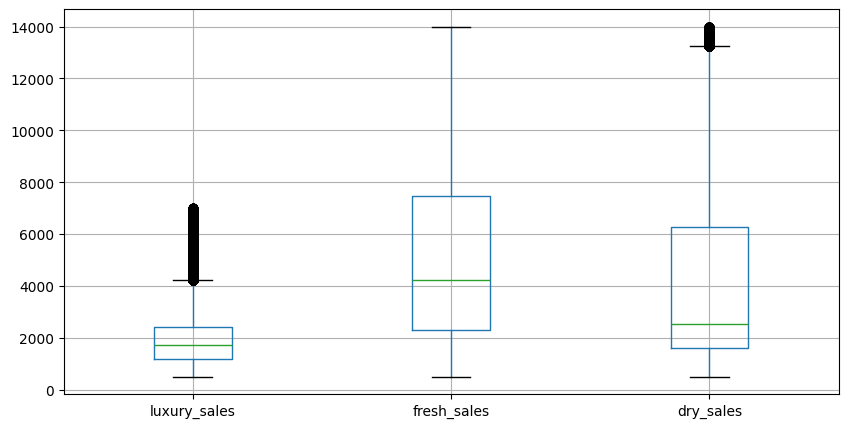

In [20]:
# outliers
df[['luxury_sales','fresh_sales','dry_sales']].boxplot(figsize=(10,5))
plt.show()

In [21]:
## remove outliers
def remove_outliers(dataframe, column):
    q1 = dataframe[column].quantile(0.25)
    q3 = dataframe[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return dataframe[(dataframe[column] > lower_bound) & (dataframe[column] < upper_bound)]

df = remove_outliers(df, 'luxury_sales')
df = remove_outliers(df, 'fresh_sales')
df = remove_outliers(df, 'dry_sales')

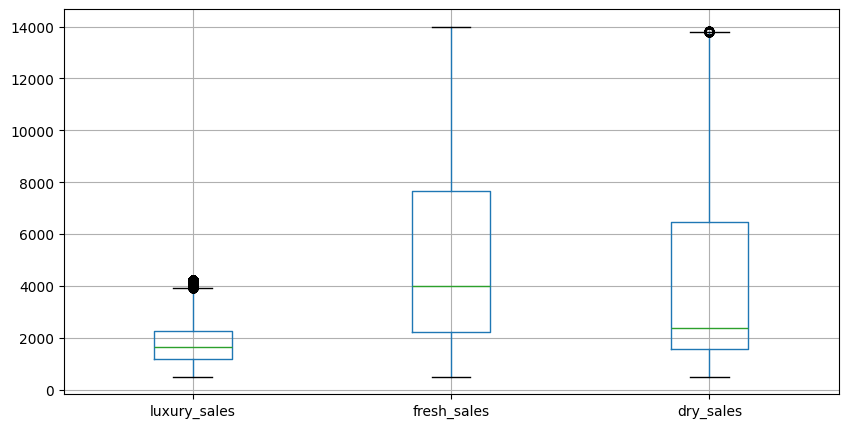

In [22]:
# outliers
df[['luxury_sales','fresh_sales','dry_sales']].boxplot(figsize=(10,5))
plt.show()

In [23]:
# get average sales for each cluster category

df_sales_avgs = df.groupby('cluster_catgeory')[['luxury_sales','fresh_sales','dry_sales']].mean().round(2)
df_sales_avgs

,luxury_sales,fresh_sales,dry_sales
cluster_catgeory,,,
1,1561.40,2186.07,8426.63
2,1249.52,6745.91,1749.27
3,2923.32,2938.06,2937.63
4,1750.42,1252.79,6748.26
5,2922.07,2938.68,2934.80
6,2185.00,8426.13,1561.93


#### **fill null values**

In [24]:
df['luxury_sales'] = df['luxury_sales'].fillna(df['cluster_catgeory'].map(df_sales_avgs['luxury_sales']))
df['fresh_sales'] = df['fresh_sales'].fillna(df['cluster_catgeory'].map(df_sales_avgs['fresh_sales']))
df['dry_sales'] = df['dry_sales'].fillna(df['cluster_catgeory'].map(df_sales_avgs['dry_sales']))

In [25]:
df.isna().sum()

Customer_ID         0
outlet_city         0
luxury_sales        0
fresh_sales         0
dry_sales           0
cluster_catgeory    0
dtype: int64

## **Analysis**

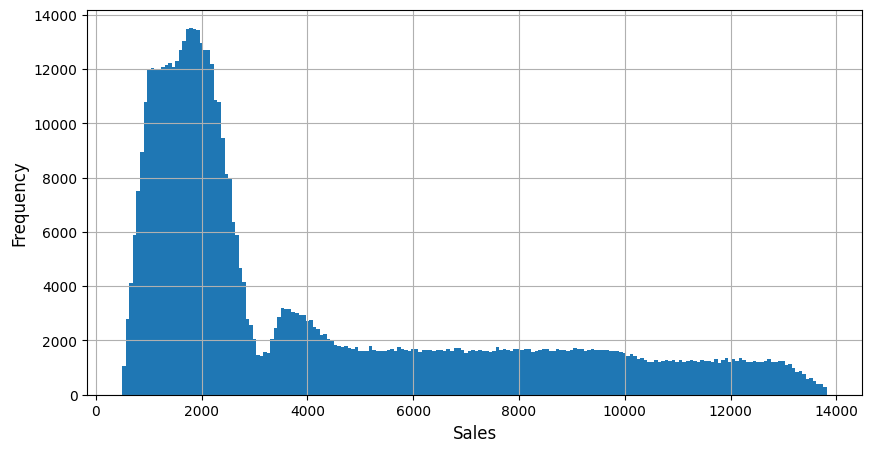

In [26]:
plt.figure(figsize=(10,5))
df['dry_sales'].hist(bins=200, figsize=(10,5))
plt.xlabel('Sales', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

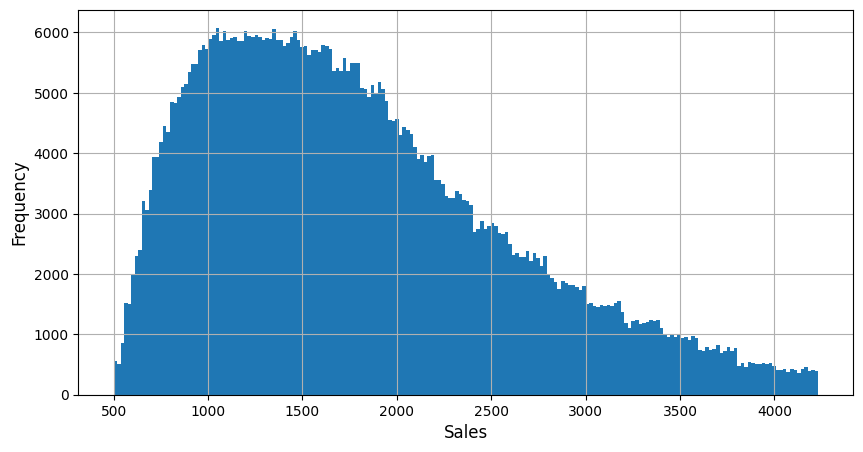

In [27]:
#hist plot
plt.figure(figsize=(10,5))
df['luxury_sales'].hist(bins=200, figsize=(10,5))
plt.xlabel('Sales', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

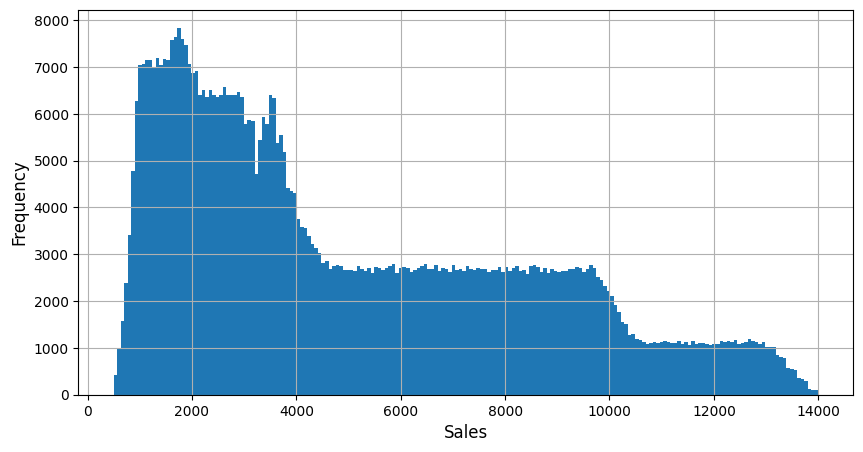

In [28]:
plt.figure(figsize=(10,5))
df['fresh_sales'].hist(bins=200, figsize=(10,5))
plt.xlabel('Sales', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

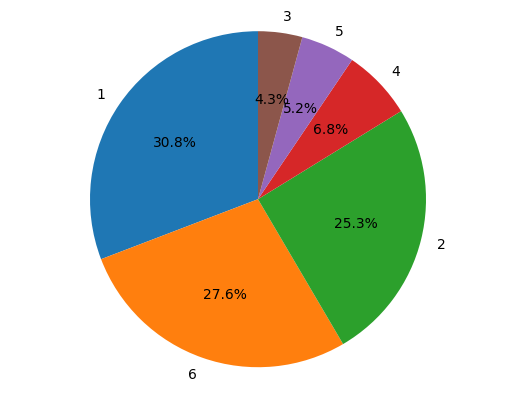

In [29]:
plt.pie(df['cluster_catgeory'].value_counts(), labels=df['cluster_catgeory'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

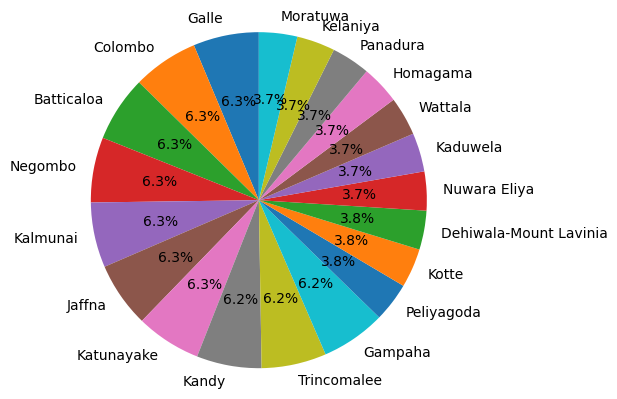

In [30]:
plt.pie(df['outlet_city'].value_counts(), labels=df['outlet_city'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

In [31]:
df['total_sales'] = df['luxury_sales'] + df['fresh_sales'] + df['dry_sales']
df['total_sales'].describe().round(2)

count    612082.00
mean      11075.36
std        3910.03
min        4509.90
25%        7810.44
50%       10739.64
75%       13851.32
max       20946.45
Name: total_sales, dtype: float64

In [32]:
df_sales_mins = df.groupby('cluster_catgeory')[['luxury_sales','fresh_sales','dry_sales','total_sales']].min().round(2)
df_sales_maxs = df.groupby('cluster_catgeory')[['luxury_sales','fresh_sales','dry_sales','total_sales']].max().round(2)
df_sales_avgs = df.groupby('cluster_catgeory')[['luxury_sales','fresh_sales','dry_sales','total_sales']].mean().round(2)
df_sales_stds = df.groupby('cluster_catgeory')[['luxury_sales','fresh_sales','dry_sales','total_sales']].std().round(2)


columns = pd.MultiIndex.from_product([['min', 'max', 'avg', 'std'],
                                      ['luxury_sales', 'fresh_sales', 'dry_sales', 'total_sales']], names=['Statistics','Sales'])


df_merged = pd.concat([df_sales_mins, df_sales_maxs, df_sales_avgs, df_sales_stds], axis=1)
df_merged.columns = columns  

df_merged

Statistics                min                                            max  \
Sales            luxury_sales fresh_sales dry_sales total_sales luxury_sales   
cluster_catgeory                                                               
1                      500.00      750.15    656.30     4509.90      4209.81   
2                      500.10      957.78    750.15     4516.20      3663.00   
3                      616.20     1170.78   1215.50     4606.44      4231.85   
4                      750.15      500.00    877.40     4583.67      4189.15   
5                      843.90     1500.60    966.00     4556.37      4231.80   
6                      750.00      987.48    500.00     4557.28      4215.66   

Statistics                                                  avg              \
Sales            fresh_sales dry_sales total_sales luxury_sales fresh_sales   
cluster_catgeory                                                              
1                   12529.44  13822.20    20736.56      1561.40     2186.07   
2                   11115.65   9753.92    16587.97      1249.52     6745.91   
3                   10198.07  11328.85    16731.84      2923.32     2938.06   
4                   12745.20  10497.90    18431.52      1750.42     1252.79   
5                   12426.48   8955.22    17698.32      2922.07     2938.68   
6                   13997.90   7110.35    20946.45      2185.00     8426.13   

Statistics                                      std                        \
Sales            dry_sales total_sales luxury_sales fresh_sales dry_sales   
cluster_catgeory                                                            
1                  8426.63    12174.10       576.65      783.84   2925.54   
2                  1749.27     9744.70       393.63     1956.01    529.36   
3                  2937.63     8799.01       752.30      781.84    781.52   
4                  6748.26     9751.47       530.45      406.52   1959.58   
5                  2934.80     8795.55       756.02      786.77    779.25   
6                  1561.93    12173.06       782.21     2924.81    576.97   

Statistics                    
Sales            total_sales  
cluster_catgeory              
1                    4230.88  
2                    2829.03  
3                    2283.87  
4                    2833.64  
5                    2289.25  
6                    4229.83

## **Feature Engineering**

##### **Encoding City**

In [33]:
uniqe_cities = df['outlet_city'].unique()
print(uniqe_cities)
len(uniqe_cities)

['Moratuwa' 'Nuwara Eliya' 'Dehiwala-Mount Lavinia' 'Kelaniya'
 'Peliyagoda' 'Kaduwela' 'Wattala' 'Kotte' 'Homagama' 'Panadura'
 'Batticaloa' 'Colombo' 'Jaffna' 'Gampaha' 'Kalmunai' 'Galle' 'Katunayake'
 'Negombo' 'Trincomalee' 'Kandy']


20

In [34]:
city_map = {
            1: 'Moratuwa',
            2: 'Nuwara Eliya',
            3: 'Dehiwala-Mount Lavinia',
            4: 'Kelaniya',
            5: 'Kaduwela',
            6: 'Wattala',
            7: 'Kotte',
            8: 'Homagama',
            9: 'Panadura',
            10: 'Batticaloa',
            11 : 'Colombo',
            12 : 'Jaffna',
            13: 'Gampaha',
            14 : 'Kalmunai',
            15 : 'Galle',
            16 : 'Katunayake',
            17 : 'Negombo',
            18 : 'Trincomalee',
            19 : 'Kandy',
            20: 'Peliyagoda'
            }


df['city_enco'] = df['outlet_city'].map(lambda city: next((cluster for cluster, cities in city_map.items() if city in cities), None))

df['city_enco'].unique()

array([ 1,  2,  3,  4, 20,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

##### **Sales Ratios**

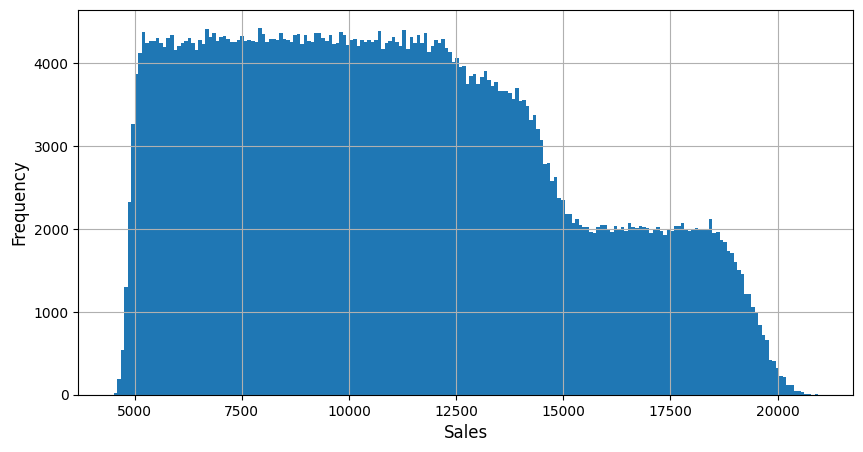

In [35]:
df['total_sales'].hist(bins=200, figsize=(10,5))
plt.xlabel('Sales', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

In [36]:
df['luxery_sales_ratio'] = (df['luxury_sales'] / df['total_sales']).round(2)
df['fresh_sales_ratio'] = (df['fresh_sales'] / df['total_sales']).round(2)
df['dry_sales_ratio'] = (df['dry_sales'] / df['total_sales']).round(2)

df.head()

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory,total_sales,city_enco,luxery_sales_ratio,fresh_sales_ratio,dry_sales_ratio
131072,10370993.0,Moratuwa,2072.47,1462.92,8046.06,4,11581.45,1,0.18,0.13,0.69
131073,10751334.0,Nuwara Eliya,1500.60,1200.48,6502.60,4,9203.68,2,0.16,0.13,0.71
131074,10482183.0,Dehiwala-Mount Lavinia,2862.00,1431.00,9444.60,4,13737.60,3,0.21,0.10,0.69
131075,10594832.0,Kelaniya,2103.15,1822.73,9394.07,4,13319.95,4,0.16,0.14,0.71
131076,10418774.0,Peliyagoda,1115.46,619.70,4275.93,4,6011.09,20,0.19,0.10,0.71


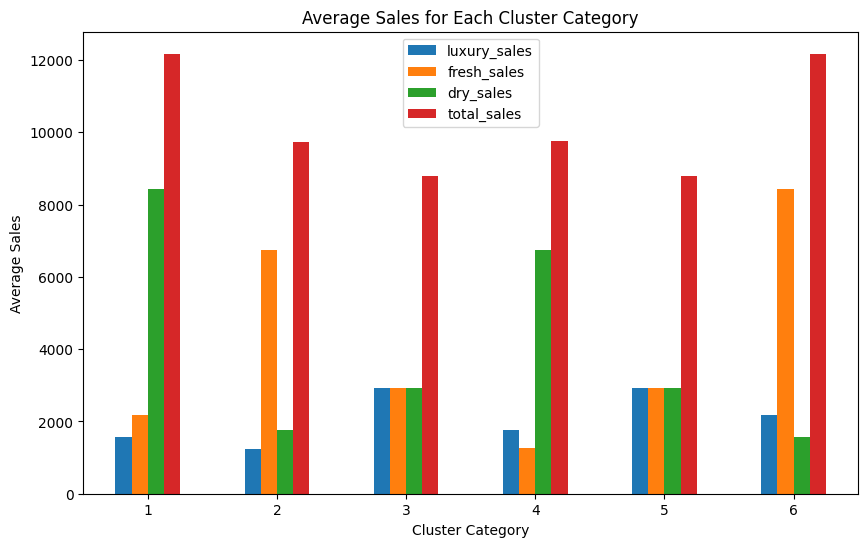

In [37]:
df_sales_avgs_1 = df.groupby('cluster_catgeory')[['luxury_sales','fresh_sales','dry_sales','total_sales']].mean().round(2)

df_sales_avgs_1.plot(kind='bar', figsize=(10,6))
plt.title('Average Sales for Each Cluster Category')
plt.ylabel('Average Sales')
plt.xlabel('Cluster Category')
plt.xticks(rotation=0)
plt.show()

### **Feature Seelction**

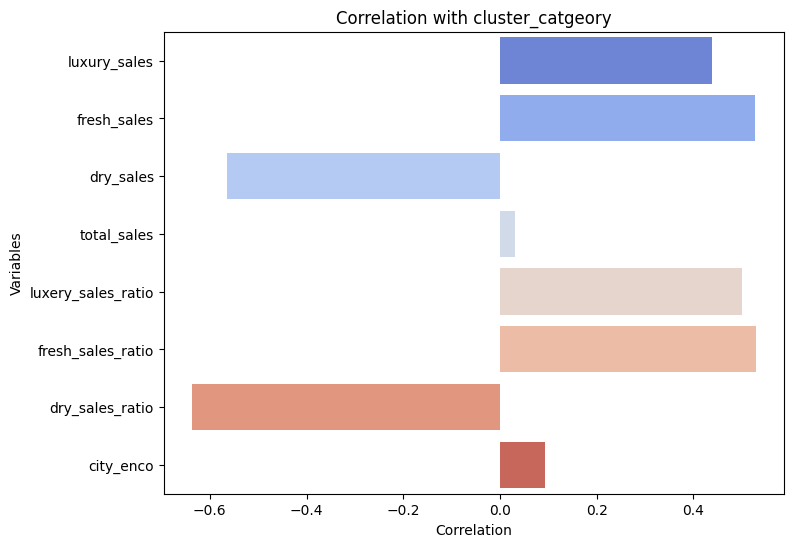

In [38]:
import seaborn as sns

# Calculate correlation matrix including specific columns
correlation_with_target = df[['luxury_sales', 'fresh_sales', 'dry_sales', 'total_sales', 
                              'luxery_sales_ratio', 'fresh_sales_ratio', 'dry_sales_ratio','city_enco']].corrwith(df['cluster_catgeory'])

# Plot correlation barplot
plt.figure(figsize=(8, 6))
sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index, palette='coolwarm')
plt.title('Correlation with cluster_catgeory')
plt.xlabel('Correlation')
plt.ylabel('Variables')
plt.show()

In [39]:
## export cleaned csv
df.to_csv("cleaned.csv")

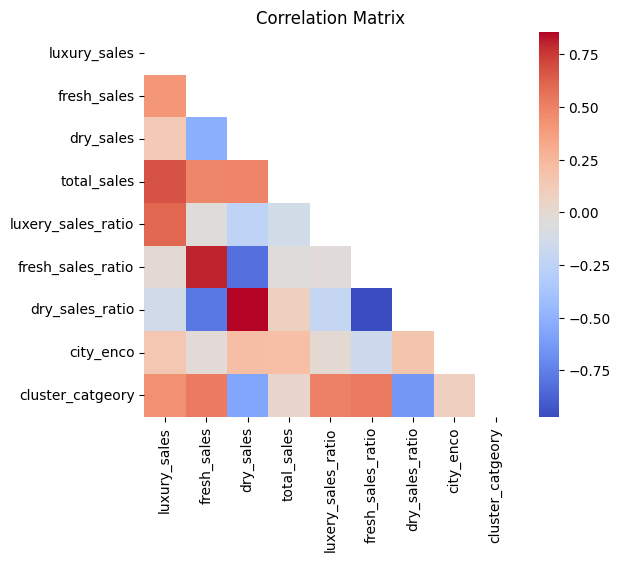

In [40]:
cor_matrix = df[['luxury_sales', 'fresh_sales', 'dry_sales', 'total_sales', 
                              'luxery_sales_ratio', 'fresh_sales_ratio', 'dry_sales_ratio','city_enco','cluster_catgeory']].corr()


mask = np.triu(np.ones_like(cor_matrix, dtype=bool))

plt.figure(figsize=(6, 5))
sns.heatmap(cor_matrix, cmap='coolwarm', fmt=".2f", mask=mask)
plt.title('Correlation Matrix')
plt.show()

In [41]:
X = df[['luxury_sales', 'fresh_sales', 'dry_sales','city_enco','total_sales']] 
Y = df['cluster_catgeory']

In [42]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 612082 entries, 131072 to 774150
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   luxury_sales  612082 non-null  float64
 1   fresh_sales   612082 non-null  float64
 2   dry_sales     612082 non-null  float64
 3   city_enco     612082 non-null  int64  
 4   total_sales   612082 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 28.0 MB


In [45]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'bootstrap': [True, False]
}

# Instantiate the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                            n_jobs=-1, verbose=2)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, Y_train)

# Get the best estimator
best_rf = grid_search.best_estimator_

# Make predictions with the best estimator
Y_pred = best_rf.predict(X_test)

# Evaluate the predictions
accuracy = accuracy_score(Y_test, Y_pred)
report = classification_report(Y_test, Y_pred)

print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ......bootstrap=True, max_depth=10, n_estimators=50; total time=  53.3s
[CV] END ......bootstrap=True, max_depth=10, n_estimators=50; total time=  54.8s
[CV] END ......bootstrap=True, max_depth=10, n_estimators=50; total time=  55.2s
[CV] END ......bootstrap=True, max_depth=10, n_estimators=50; total time=  56.8s
[CV] END ......bootstrap=True, max_depth=10, n_estimators=50; total time=  56.9s
[CV] END .....bootstrap=True, max_depth=10, n_estimators=100; total time= 1.8min
[CV] END .....bootstrap=True, max_depth=10, n_estimators=100; total time= 1.8min
[CV] END .....bootstrap=True, max_depth=10, n_estimators=100; total time= 1.9min
[CV] END .....bootstrap=True, max_depth=10, n_estimators=100; total time= 1.9min
[CV] END .....bootstrap=True, max_depth=10, n_estimators=100; total time= 1.9min
[CV] END ......bootstrap=True, max_depth=20, n_estimators=50; total time= 1.0min
[CV] END ......bootstrap=True, max_depth=20, n_e

In [46]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9998447927983859


In [47]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     37667
           2       1.00      1.00      1.00     30989
           3       1.00      1.00      1.00      5197
           4       1.00      1.00      1.00      8316
           5       1.00      1.00      1.00      6383
           6       1.00      1.00      1.00     33865

    accuracy                           1.00    122417
   macro avg       1.00      1.00      1.00    122417
weighted avg       1.00      1.00      1.00    122417



In [48]:
# save model as pickle file

import pickle

with open('model_1.pkl', 'wb') as model_file:
    pickle.dump(rf, model_file)
    